In [1]:
from BranchingProcess import Person, BranchingProcess, read_from_files
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from collections import Counter
#import plotly as py
#import plotly.graph_objs as go
from datetime import date, timedelta,datetime

%matplotlib inline

#py.tools.set_credentials_file(username='roller145', api_key='8ggrhbcyaw')

In [2]:
V = ['E', 'N', 'W', 'C', 'Q', 'G', 'R', 'F', 'O', 'I']
V = map(lambda x:  x + '.txt',V)
V = list(V)
P = read_from_files(V)
num1 = len(P) 
print( 'number of processes:' + str(num1))

number of processes:68532


In [3]:
Persons = []
for proc in P:
    for gen in proc.generations:
        for per in gen:
            if ((per.birthday != '') | (per.deathdate != '')):
                Persons.append(per)


In [4]:
P = [p for p in P if len(p.generations) > 1]
num2 = len(P)
print( 'number of processes with second generation:' + str(num2))

number of processes with second generation:19769


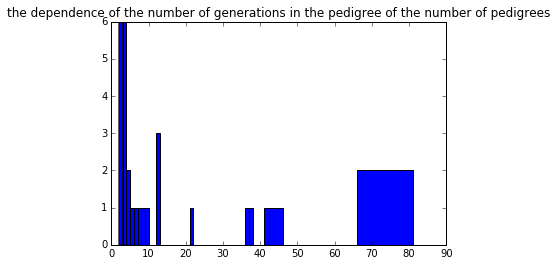

x_min = 2 x_max = 81 x_mean = 26.8666666667


In [39]:
GLen = [len(p.generations) for p in P]
cnt = Counter() 
for l in GLen:
    cnt[l] += 1
Itm = cnt.items()
Y = [num for (l,num) in Itm]
X = [l for (l,num) in Itm]
plt.title("the dependence of the number of generations in the pedigree of the number of pedigrees")
plt.hist(Y, X)
plt.show()
ages = X
x_min = np.min(X)
x_max = np.max(X)
x_mean = np.mean(X)

print('x_min = '+ str(x_min) + ' x_max = '+ str(x_max) + ' x_mean = '+ str(x_mean))

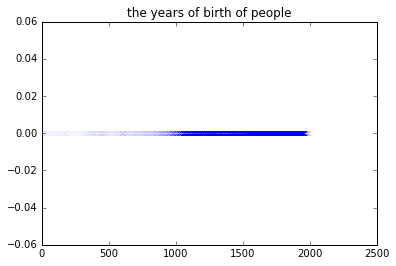

In [6]:
from dateutil.relativedelta import relativedelta
def parse_year(str):
    s= str.split('-')
    if (s[0] != ''):
        return int(s[0])

def parse_delta(p):
    str1,str2 = p.birthday, p.deathdate
    s1 = str1.split('-')
    s2 = str2.split('-')
    if ((s2[0] == '') | (s1[0] == '')):
        return
    else:
        diff = parse_year(str2) - parse_year(str1)
        return diff

DeltaYears = []
BirthYears = []

for p in Persons:
    res = parse_delta(p)
    if (res):
        if ( (res >= 0) & (res < 150)):
            DeltaYears.append(res)
            BirthYears.append(parse_year(p.birthday))

Date = [parse_year(p.birthday) for p in Persons]
plt.title('the years of birth of people')
plt.plot(Date, np.zeros_like(Date), 'x', alpha=0.005) #it's hard to understand with bigger alpha 
plt.show()



In [7]:
biggest_life = np.max(DeltaYears)
birth_biggest = BirthYears[DeltaYears.index(biggest_life)]
smallest_life = np.min(DeltaYears)
birth_smallest = BirthYears[DeltaYears.index(smallest_life)]
mean_life = np.mean(DeltaYears)
print('biggest life = '+ str(biggest_life) + ' smallest life = '+ str(smallest_life) + ' life mean = '+ str(mean_life))
print('biggest life birthday= '+ str(birth_biggest) + ' smallest life birthday= '+ str(birth_smallest))


biggest life = 149 smallest life = 1 life mean = 60.7145136911
biggest life birthday= 1811 smallest life birthday= 1917


Так как инфомация  исходных данных недостоверна, то мы не брали во внимание людей, путешествующих во времени

In [13]:
DefaultProcess = []
for p in P:
    for i in range(len(p.generations)):
        if len(DefaultProcess) <= i:
            DefaultProcess.append(p.generations[i])
        else:
            DefaultProcess[i] = DefaultProcess[i] + p.generations[i]

In [24]:
Fem = []
for p in Persons:
    if (p.gender != 'male'):
        Fem.append(p.name)
        Persons.remove(p)
    elif (p.birthday != '' and parse_year(p.birthday) < 1950):
        Persons.remove(p)


/home/riv/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/riv/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


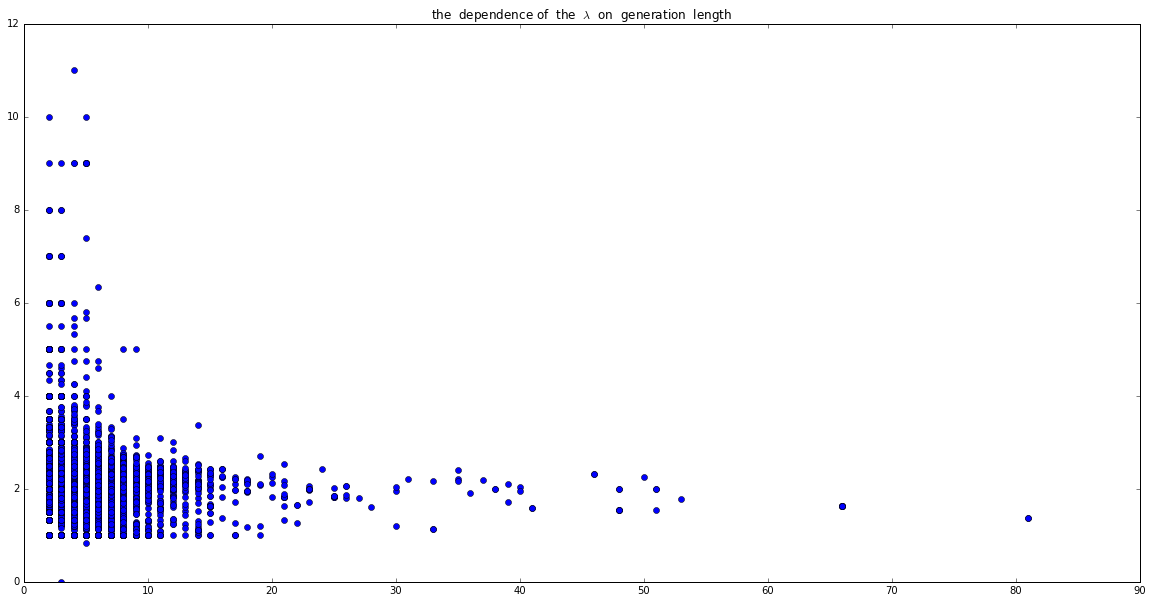

In [26]:
FemSet = set(Fem)
X = []
Y = []
for proc in P:
    PX = []
    for gen in proc.generations:
        for per in gen:
            if ((per.gender == 'male') and ((per.birthday != '') and (parse_year(per.birthday) < 1950))):
                Ch = []
                for ch in per.children:
                    if (ch not in FemSet):
                        Ch.append(ch)
                PX.append(len(Ch))
    X.append(PX)
    Y.append(len(proc.generations))
Means = [np.mean(PX) for PX in X]
one_big_sum = np.sum([np.sum(XP) for XP in X ])
one_big_size = np.sum([len(XP) for XP in X])
one_big_mean = one_big_sum/one_big_size
plt.figure(figsize=(20,10))
plt.title('the  dependence of  the  $\lambda$  on  generation  length')
plt.plot(Y,Means, "o")
plt.show()

Так как для каждого мужчины количество его потомков-мужчин - случайная величина с Пуассоновским распределением, то ${\hat{\lambda}} = \bar{x}$, как оценка максимального правдоподобия для данного распределения (выборкой в данном случае является количество детей - мальчиков у каждого из мужчин в процессе, так как все эти с.в. независимы и одинаково распределены)

In [25]:
print(one_big_mean)

1.69849203463


Собственно, само распределение на графике ниже ($\hat\lambda = 1.6984$)

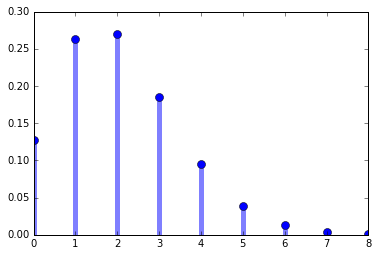

In [32]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mu = one_big_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.9999, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [34]:
hi_2 = 0
distr = [0]*60
for p in X:
    for x in p:
        distr[x] += 1
number_of_man = sum(distr)

for i in range(1, len(distr)):
    math_expectation = number_of_man * poisson.pmf(i, mu)
    hi_2 += (distr[i] - math_expectation) ** 2 / math_expectation

probab = [x / float(number_of_man) for x in distr]
print(hi_2)

2.11073193729e+27


Пуассоновское распределение довольно тки плохо приближает наш процесс

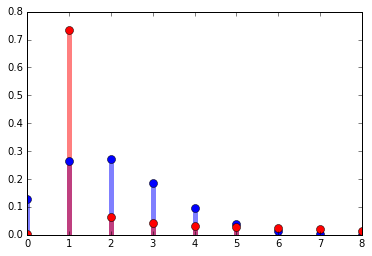

In [35]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.9999, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

ax.plot(x, probab[:len(x)], 'ro', ms=8, label='our distr')
ax.vlines(x, 0, probab[:len(x)], colors='r', lw=5, alpha=0.5)
plt.show()

Здесь вы можете наблюдать, насколько всё плохо

In [36]:
def rand():
    return sps.poisson.rvs(one_big_mean)

next_gen = len(DefaultProcess[0])

PrevGenerations = []

while(next_gen > 1) :
    ch_sum = 0
    num_gays = 0
    PG = []
    while (ch_sum < next_gen):
        num_gays += 1
        diff = rand()
        if (ch_sum + diff < next_gen):
            PG.append(diff)
            ch_sum += diff
        else:
            PG.append(next_gen - ch_sum)
            ch_sum = next_gen
    PrevGenerations.append(PG)
    next_gen = num_gays
    
print([np.sum(PG) for PG in PrevGenerations])
print(" number of previous generations: " + str(len(PrevGenerations)+1))

[19769, 9595, 4635, 2214, 1052, 527, 272, 138, 70, 37, 20, 10, 4, 4]
 number of previous generations: 15


Нет, процесс не разрастается, наоборот, моделирование показывает, что общий предок мог быть

In [47]:
def get_last_gen_process(proc):
    return proc.generations[-1]

def models_one_family(period, generation, avarage_age, mu):
    if avarage_age < 1 or mu < 0.1:
        print("error in modelOneFamily")
        return []
    time = 0
    gen = [sum(generation)]
    while (time < period):
        nextGen = 0
        time += avarage_age
        for i in range(gen[-1]):
            nextGen += rand()
        gen.append(nextGen)
    return gen

last_generations = [len(get_last_gen_process(x)) for x in P]

model_all = models_one_family(60, last_generations, np.mean(ages), mu)


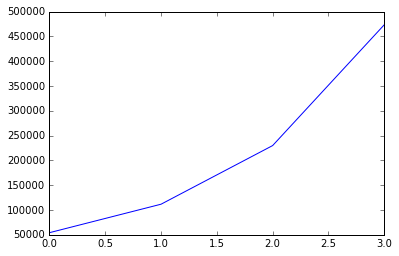

In [48]:
plt.plot(np.arange(0, len(model_all)), model_all)
plt.show()

In [49]:
%time model_one_family = [models_one_family(60, [last_generations[i]], ages[i], Means[i]) for i in range(1, 45)]

CPU times: user 6.4 s, sys: 0 ns, total: 6.4 s
Wall time: 6.4 s


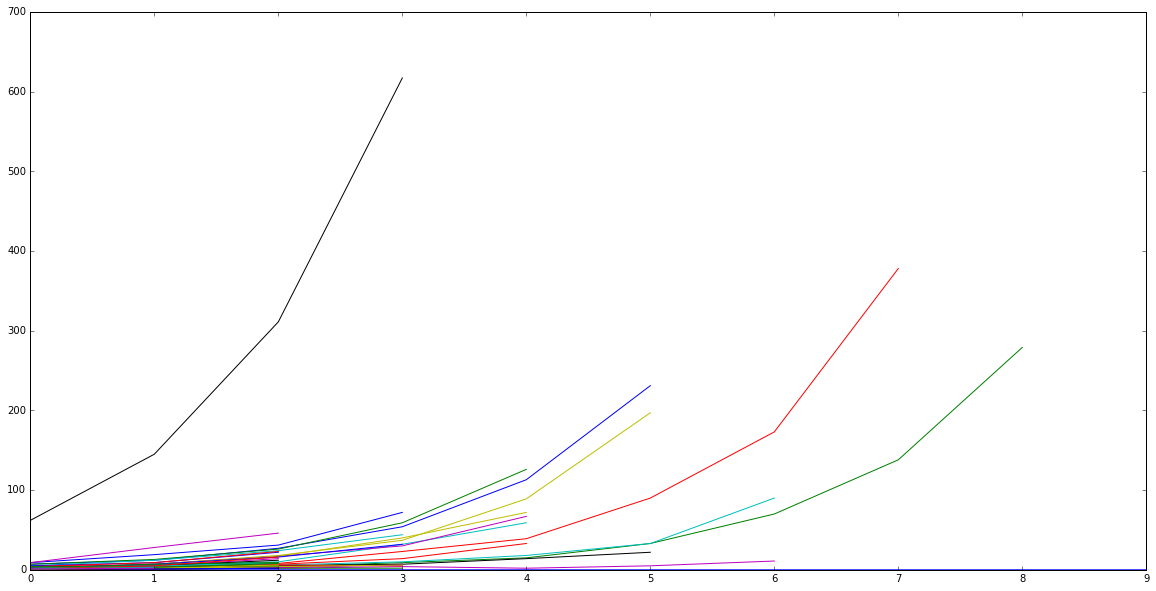

In [50]:
plt.figure(figsize=(20,10))
for i in range(len(model_one_family)):
    x = model_one_family[i]
    if (ages[i] > 5):
        plt.plot(np.arange(0, len(x)), x)
plt.show()

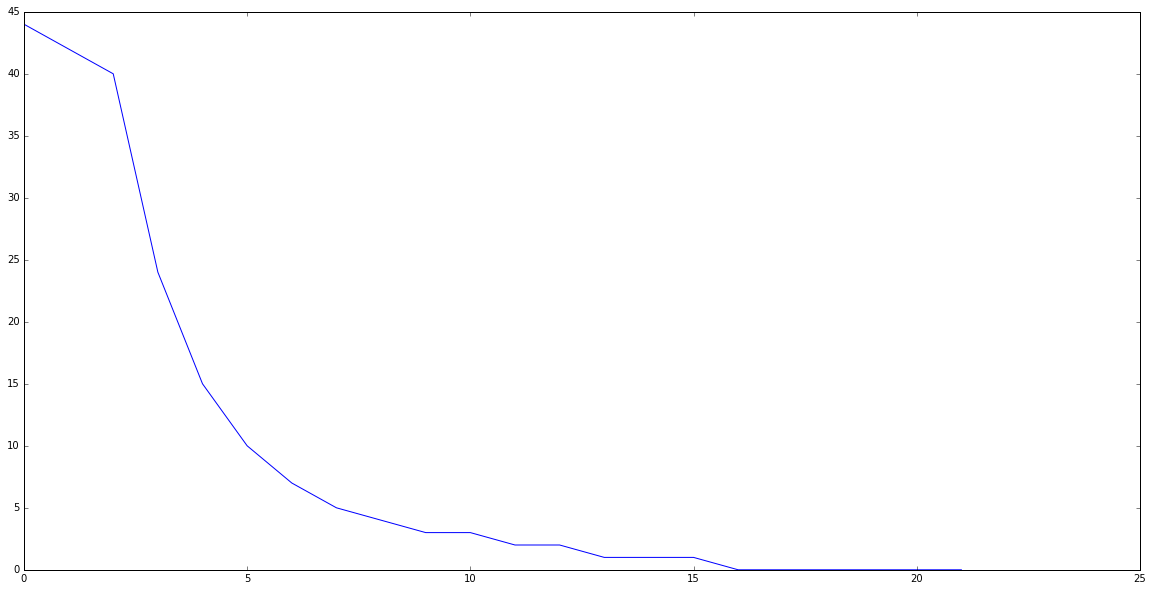

In [52]:
plt.figure(figsize=(20,10))
number_of_families = [0] * (max([len(x) for x in model_one_family]) + 1)
for x in model_one_family:
    for i in range(len(x)):
        if x[i] > 0:
            number_of_families[i] += 1

plt.plot(np.arange(0, len(number_of_families)), number_of_families)
plt.show()

$\varphi(z) = \varphi_{\lambda}(z) = \Sigma \frac{\lambda^k}{k!}e^{-\lambda} z^k = e^{-\lambda} \Sigma \frac{(\lambda z)^k}{k!} = e^{\lambda(z - 1)}$

In [93]:
import math
func  = lambda mu_par, z: math.exp(mu_par*(z-1)) - z
bounds = [0, 1]

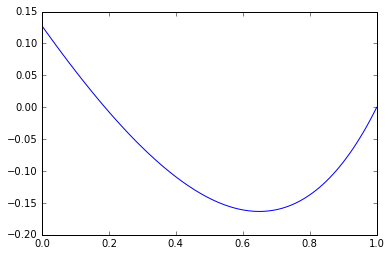

[ 0.18809427]


In [110]:
from scipy.optimize import fsolve

z = np.linspace(0, 1, 100)
plt.plot(z, [func(mu,x) for x in z])
plt.show()

one_func = lambda z : func(mu, z)
z_solution = fsolve(one_func,0.5 )

print(z_solution)

/home/riv/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


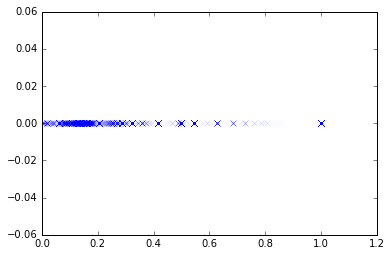

In [113]:
Results = []
for mu_i in Means:
    one_func = lambda z : func(mu_i, z)
    z_solution = fsolve(one_func,0.5 )
    Results.append(np.min(z_solution)) 
plt.plot(Results, np.zeros_like(Results), 'x', alpha=0.02) #it's hard to understand with bigger alpha 
plt.show()
